In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")



In [ ]:
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 7


In [ ]:
data.drop(['Loan_ID'],axis=1,inplace=True)


<ipython-input-13-c397d98ea4e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y,palette=colors[:len(y)])
<ipython-input-13-c397d98ea4e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y,palette=colors[:len(y)])
<ipython-input-13-c397d98ea4e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y,palette=colors[:len(y)])
<ipython-input-13-c397d98ea4e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

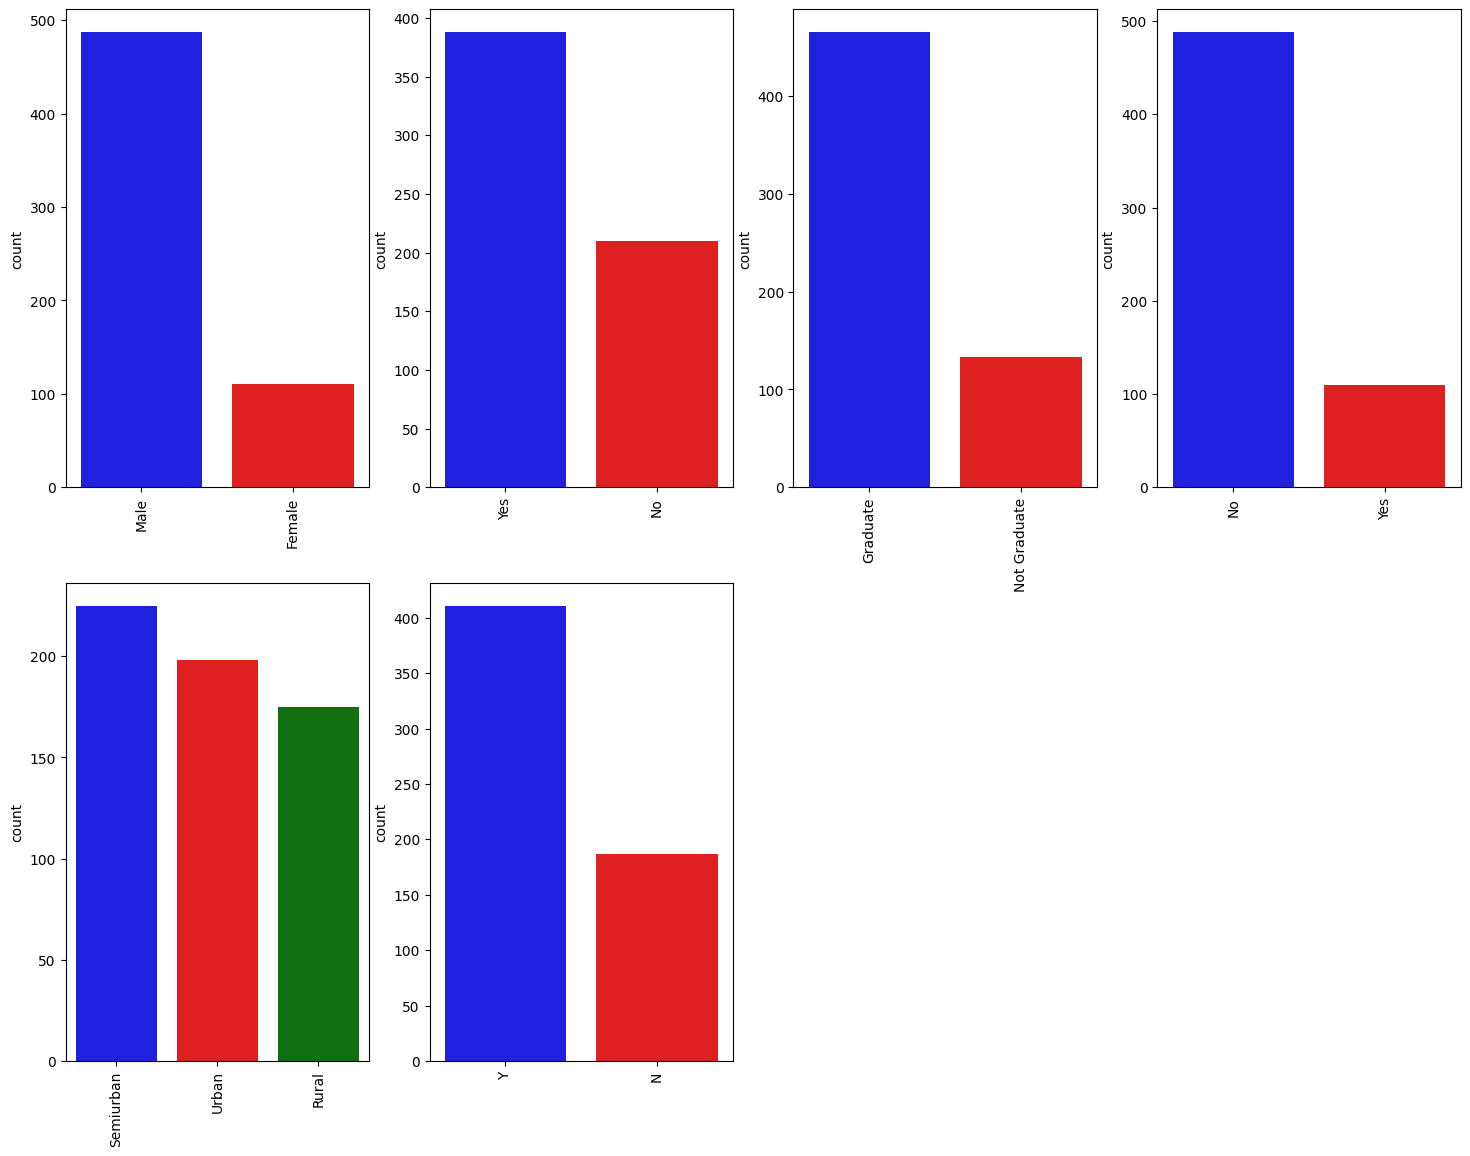

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
colors = ['blue', 'red', 'green']
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(5,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y,palette=colors[:len(y)])
  index +=1


In [ ]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])


In [ ]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

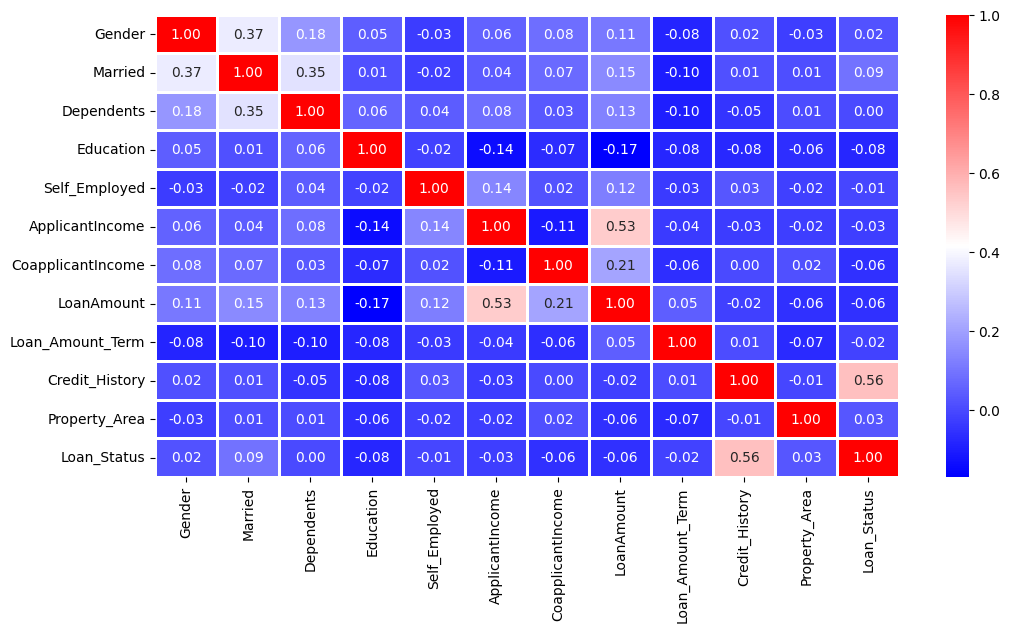

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='bwr',fmt='.2f',
            linewidths=2,annot=True)


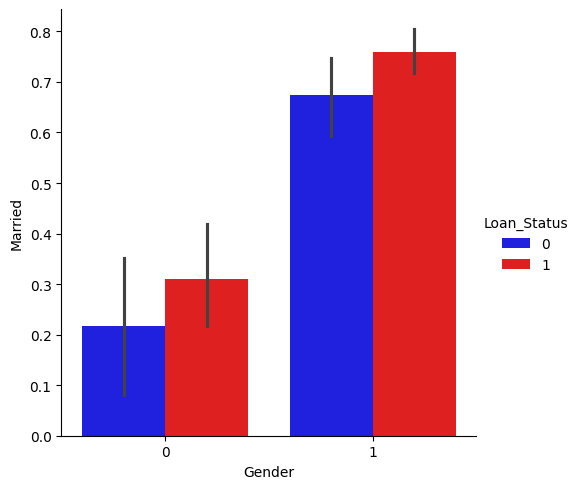

In [ ]:
colors = ['blue', 'red', 'green']
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data,palette=colors[:len(y)])


In [ ]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

Training Set Evaluation:
Accuracy score of  RandomForestClassifier = 98.04469273743017
Confusion Matrix:
 [[109   5]
 [  2 242]]


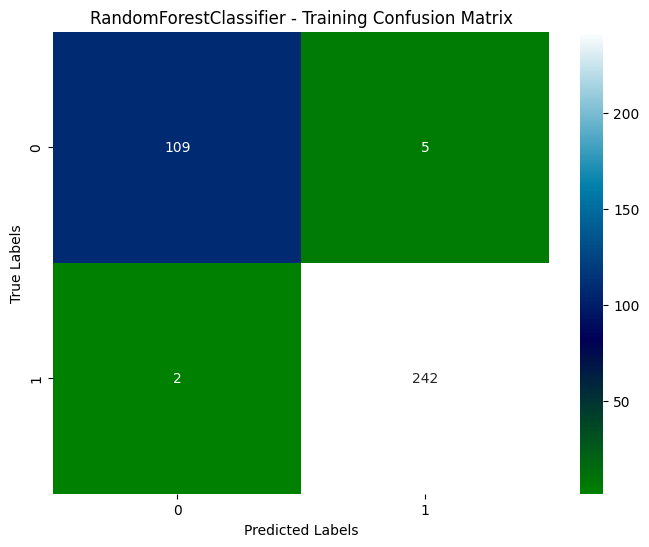

Accuracy score of  KNeighborsClassifier = 81.28491620111731
Confusion Matrix:
 [[ 60  54]
 [ 13 231]]


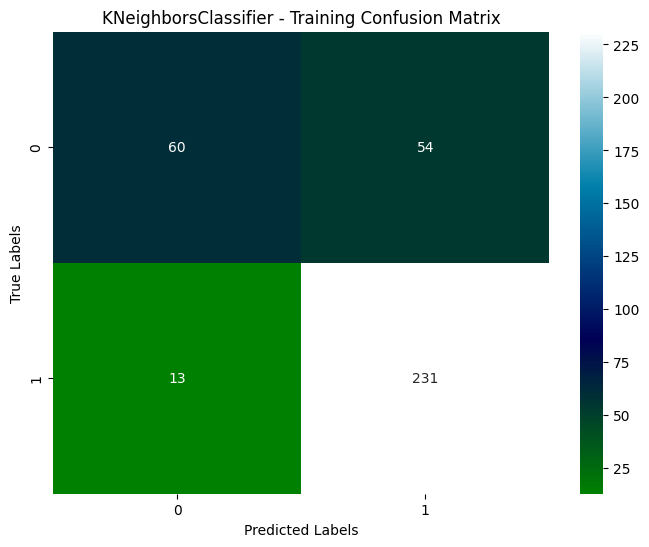

Accuracy score of  SVC = 81.00558659217877
Confusion Matrix:
 [[ 49  65]
 [  3 241]]


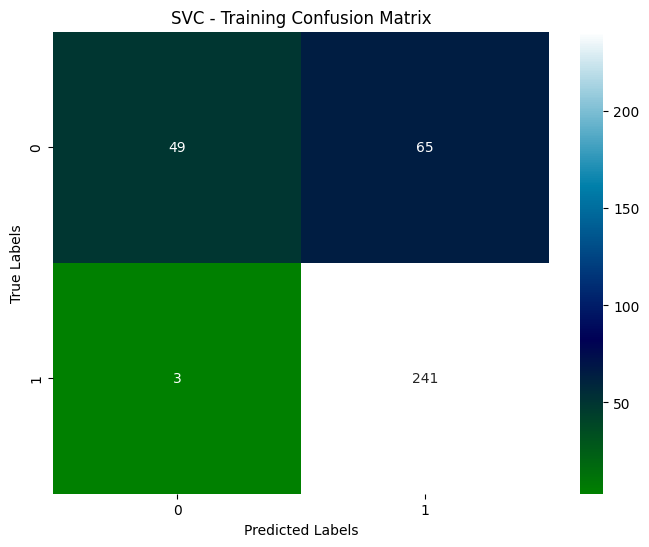

Accuracy score of  LogisticRegression = 80.44692737430168
Confusion Matrix:
 [[ 49  65]
 [  5 239]]


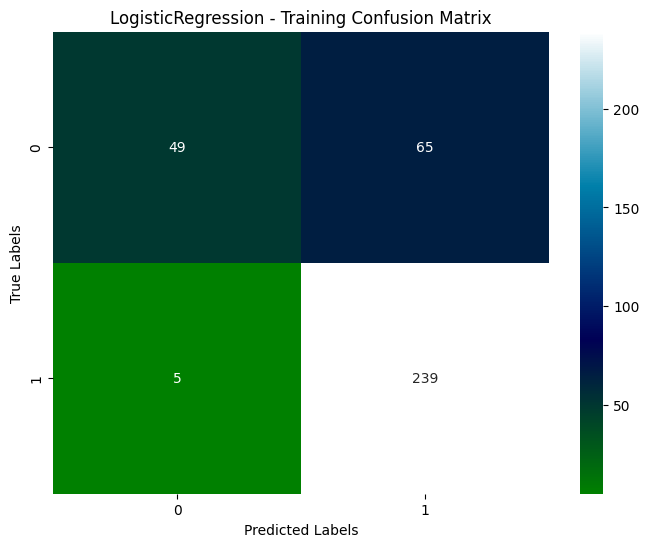


Testing Set Evaluation:
Accuracy score of  RandomForestClassifier = 82.5
Confusion Matrix:
 [[ 45  28]
 [ 14 153]]


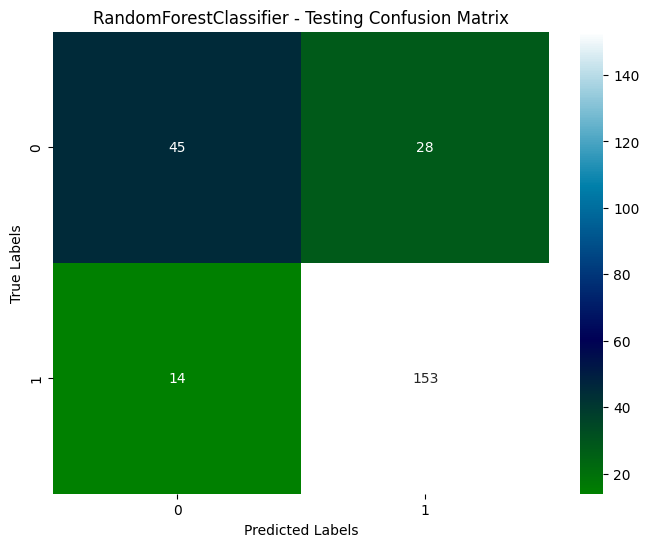

Accuracy score of  KNeighborsClassifier = 76.66666666666667
Confusion Matrix:
 [[ 37  36]
 [ 20 147]]


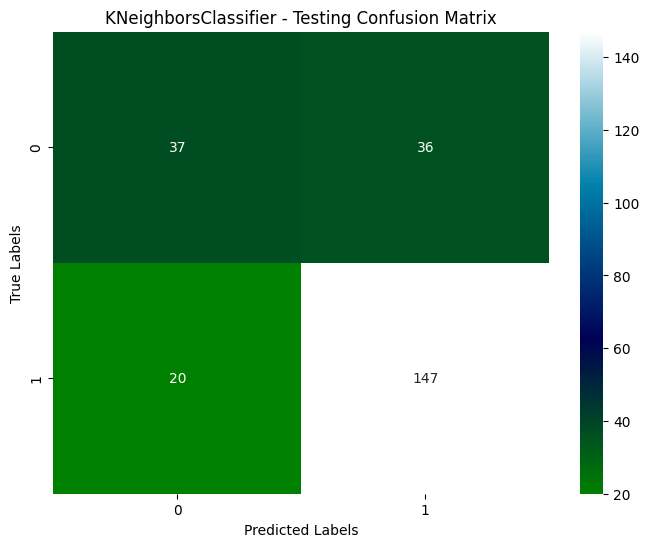

Accuracy score of  SVC = 81.25
Confusion Matrix:
 [[ 32  41]
 [  4 163]]


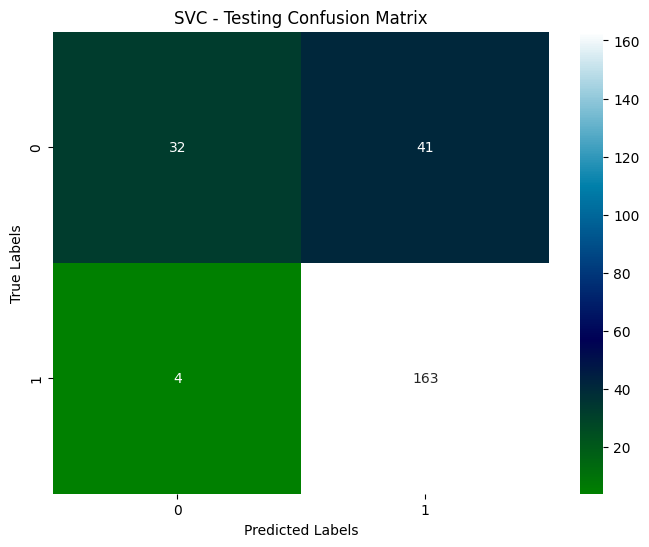

Accuracy score of  LogisticRegression = 82.08333333333333
Confusion Matrix:
 [[ 35  38]
 [  5 162]]


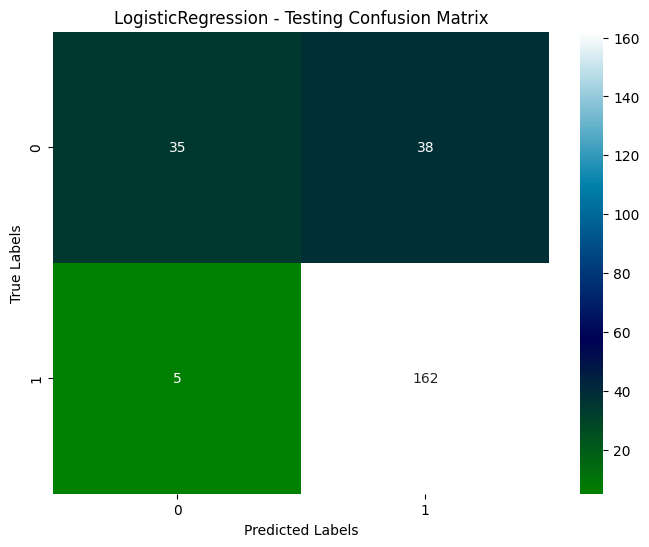

In [96]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for visualization

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7,
                             criterion='entropy',
                             random_state=7)
svc = SVC()
lc = LogisticRegression(max_iter=1000)

# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="ocean")
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# making predictions on the training set (using scaled data)
print("Training Set Evaluation:")
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train_scaled, Y_train)  # Fit on scaled training data
    Y_pred_train = clf.predict(X_train_scaled)  # Predict on scaled training data
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=", 100 * metrics.accuracy_score(Y_train, Y_pred_train))
    print("Confusion Matrix:\n", confusion_matrix(Y_train, Y_pred_train))
    plot_confusion_matrix(Y_train, Y_pred_train, f"{clf.__class__.__name__} - Training Confusion Matrix")

# making predictions on the testing set (using scaled data)
print("\nTesting Set Evaluation:")
for clf in (rfc, knn, svc, lc):
    Y_pred_test = clf.predict(X_test_scaled)  # Predict on scaled test data
    print("Accuracy score of ",
          clf.__class__.__name__, "=",
          100 * metrics.accuracy_score(Y_test, Y_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_test))
    plot_confusion_matrix(Y_test, Y_pred_test, f"{clf.__class__.__name__} - Testing Confusion Matrix")